In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.keys())
print(housing.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
# x_data : 데이터
# y_data : 타겟
x_data = housing.data
y_data = housing.target

# 데이터셋 shape 출력
print(x_data.shape)
print(y_data.shape)

(20640, 8)
(20640,)


#### 위에 보면 알듯이, 데이터의 feature 는 8개, 갯수는 20640 개다.
#### 타겟은 실수(Real Number)이다.

In [6]:
from sklearn import model_selection
# train_test_split : 학습데이터와 테스트 데이터셋 비율 반영 , 여기서 TRAIN : TEST = 8 : 2
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data,y_data,test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler

# 각 데이터들을 정규화 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [8]:
# 데이터 전처리

x_train_selected = x_train_scaled[:, 0:4]
x_test_selected = x_test_scaled[:, 0:4]

print(x_train_selected.shape)
print(x_test_selected.shape)

(16512, 4)
(4128, 4)


In [9]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(8,), activation='relu')
regr.fit(x_train_selected, y_train)

y_test_hat = regr.predict(x_test_selected)

모델 MLPRegressor(hidden_layer_sizes=(8,))
모델 loss 값 변화 [2.744293295926932, 2.015636179881892, 1.4718859840287761, 1.0718362968217896, 0.7914039375344107, 0.6076826879566722, 0.49667705909600807, 0.43423892593877916, 0.39928783766804693, 0.37829227536911963, 0.36423078713653856, 0.3529991011408233, 0.34324696122068477, 0.33443948179516075, 0.3265852712452063, 0.31959309782915574, 0.31347574668236816, 0.30789592115403075, 0.3028506042979658, 0.2984421088526381, 0.2945597256478548, 0.2909741704349385, 0.288031492870141, 0.2853856307603752, 0.28336752197331627, 0.2816317505874828, 0.2801975767606502, 0.27900980255742985, 0.2778254491212499, 0.2768021790530823, 0.2759178852648583, 0.27496177928945675, 0.27411809380356045, 0.2731979096814886, 0.2725055509598694, 0.27192284120584864, 0.27109776350091885, 0.2709854371428993, 0.27008466076273513, 0.2691488881964784, 0.26903822612010847, 0.2678940458610535, 0.2677186035826164, 0.26687495539660194, 0.26618451417520317, 0.26553871751400143, 0.26494

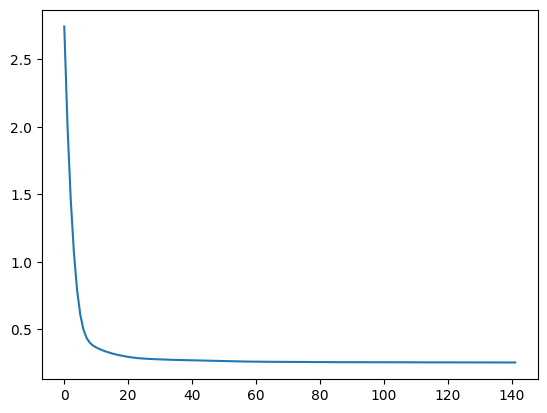

In [10]:
import matplotlib.pyplot as plt

print("모델",regr)
print("모델 loss 값 변화",regr.loss_curve_)
plt.plot(regr.loss_curve_)

print("모델 성능",regr.score(x_test_selected, y_test))

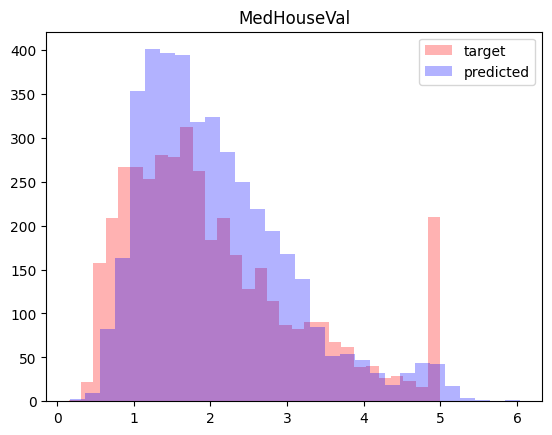

In [11]:
plt.hist(y_test, 30, color='red', alpha=0.3)
plt.hist(y_test_hat, 30, color='blue', alpha=0.3)
plt.title('MedHouseVal')
plt.legend(['target', 'predicted'])

모델 MLPRegressor(hidden_layer_sizes=(16,))
모델 loss 값 변화 [2.1478300193547573, 1.0116507062382658, 0.5905283391235819, 0.46967533370946857, 0.41763844325528154, 0.37974583598233147, 0.3506085502977232, 0.32650728419582453, 0.30697324893839806, 0.29137405227845053, 0.27817764301359493, 0.26727319714065256, 0.2578552039388695, 0.25003469480242435, 0.24310415661048757, 0.23671783264646235, 0.23100839415697352, 0.22613937060201178, 0.2219313226469059, 0.21845885146498467, 0.2157245460675726, 0.21315058650132168, 0.2112436946089556, 0.20923602093751023, 0.20761291813539987, 0.2058147863384096, 0.20447559779485922, 0.20325767899887345, 0.2021047103885087, 0.2010604858402326, 0.20005901196685777, 0.19888694050355685, 0.1979875239219903, 0.19686159083951055, 0.19590066243156679, 0.19505022308550363, 0.19429335288930677, 0.19351819148915447, 0.19243107582152705, 0.19180359879516462, 0.19062129804856007, 0.19009237631688317, 0.18904082174203066, 0.1883163086178053, 0.18785687036474794, 0.1869466075

C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


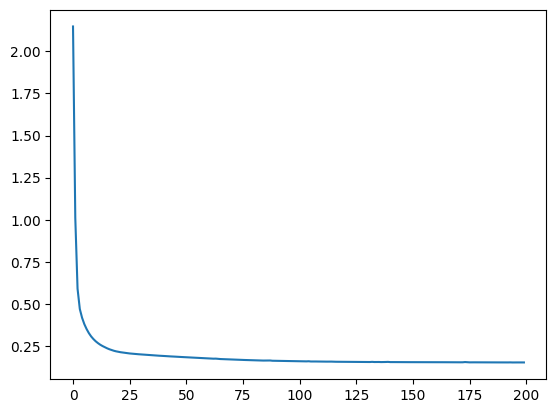

In [12]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data,y_data,test_size=0.2)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

regr2 = MLPRegressor(hidden_layer_sizes=(16,), activation='relu')
regr2.fit(x_train_scaled, y_train)
y_test_hat = regr2.predict(x_test_scaled)

print("모델",regr2)
print("모델 loss 값 변화",regr2.loss_curve_)
plt.plot(regr2.loss_curve_)

print("모델 성능",regr2.score(x_test_scaled, y_test))


In [13]:
from sklearn.linear_model import LinearRegression

regr3 = LinearRegression()
regr3.fit(x_train_scaled,y_train)
y_test_hat = regr3.predict(x_test_scaled)

print(regr3)
print(regr3.score(x_test_scaled,y_test))

LinearRegression()
0.5937097887761861


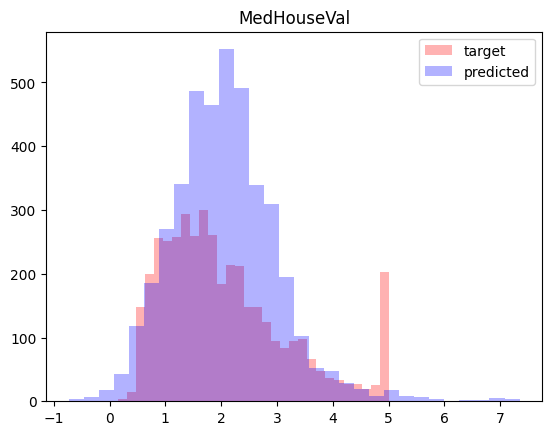

In [14]:
plt.hist(y_test, 30, color='red', alpha=0.3)
plt.hist(y_test_hat, 30, color='blue', alpha=0.3)
plt.title('MedHouseVal')
plt.legend(['target','predicted'])

In [15]:
from keras import layers, models

#데이터 하나의 shape
input_shape = (x_train_scaled.shape[1],)
print(input_shape)

(8,)


In [16]:
regr_model = models.Sequential()
regr_model.add(layers.Dense(units=4, activation='relu', input_shape = input_shape))
regr_model.add(layers.Dense(units=2, activation='relu'))
regr_model.add(layers.Dense(units=1, activation='linear'))

regr_model.compile(loss='mean_squared_error')
regr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = regr_model.fit(x_train_scaled, y_train, validation_data = [x_test_scaled, y_test], epochs=100)

Epoch 1/100
516/516 [==============================] - 3s 3ms/step - loss: 1.8312 - val_loss: 0.7948
Epoch 2/100
516/516 [==============================] - 2s 3ms/step - loss: 0.6166 - val_loss: 0.5472
Epoch 3/100
516/516 [==============================] - 2s 3ms/step - loss: 0.5143 - val_loss: 0.4840
Epoch 4/100
516/516 [==============================] - 2s 3ms/step - loss: 0.4720 - val_loss: 0.4745
Epoch 5/100
516/516 [==============================] - 2s 4ms/step - loss: 0.4549 - val_loss: 0.4785
Epoch 6/100
516/516 [==============================] - 2s 3ms/step - loss: 0.4432 - val_loss: 0.4873
Epoch 7/100
516/516 [==============================] - 2s 3ms/step - loss: 0.4318 - val_loss: 0.5079
Epoch 8/100
516/516 [==============================] - 1s 3ms/step - loss: 0.4272 - val_loss: 0.5123
Epoch 9/100
516/516 [==============================] - 2s 3ms/step - loss: 0.4220 - val_loss: 0.5122
Epoch 10/100
516/516 [==============================] - 1s 3ms/step - loss: 0.4161 - val_lo

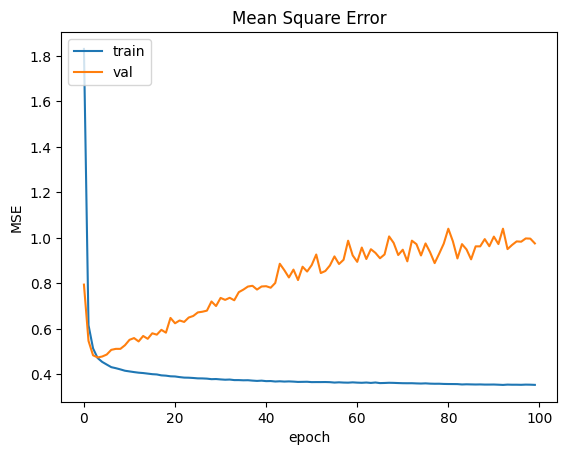

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Square Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784')
print(mnist.keys())

C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [58]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13303683589828590661
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22385000448
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7664787173772873137
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9"
 xla_global_id: 416903419]

In [59]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [61]:
from sklearn import model_selection

x_data = mnist.data
y_data = mnist.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

print(np.max(np.max(x_train_scaled)) , np.min(np.min(x_train_scaled)))
print(np.max(np.max(x_test_scaled)) , np.min(np.min(x_test_scaled)))

1.0 0.0
1.0 0.0


In [63]:
from sklearn.preprocessing import  LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

print(y_train[0:5])
print(y_test[0:5])

27020    1
20651    4
26200    8
58188    7
41668    2
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
36959    8
39918    2
58614    7
43374    7
46499    1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16620862032191200676
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22385000448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 54099953048929929
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]
[1.5197790904930848, 0.6654412596279647, 0.5161863052988201, 0.43998546282788076, 0.3896331395242181, 0.3532030733895168, 0.323395892601606, 0.2973659540371053, 0.27446288914628186, 0.2549050596957983, 0.23962775538625006, 0.22540021507545488, 0.21259300893970662, 0.20092725058351837, 0.19096420014167967, 0.1814439604818194, 0.17304892031742966, 0.16557032675071345, 0.15823220927920187, 0.15107450353327578, 0.14522168144601763, 0.13976541710276585, 0.13442367692877455, 0.12951710488984522, 0.12487714599966505, 0.12072767852665364]


C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9462142857142857

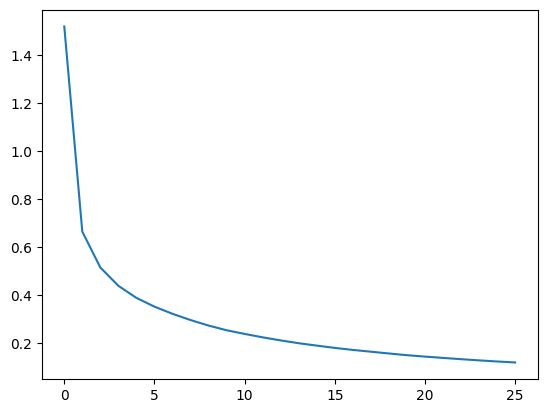

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

clf = MLPClassifier(hidden_layer_sizes=(50,))

with tf.device("/device:GPU:0"):
    clf.fit(x_train_scaled,y_train_onehot)
    
y_test_hat = clf.predict(x_test_scaled)

print(clf.loss_curve_)
plt.plot(clf.loss_curve_)
metrics.accuracy_score(y_test_onehot, y_test_hat)

In [26]:
#from tensorflow.keras.utils import layers, models
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.losses import categorical_crossentropy
input_shape = (x_train_scaled.shape[1],)
print(input_shape)

(784,)


In [78]:
# 오류 해결 : https://stackoverflow.com/questions/47262955/how-to-import-keras-from-tf-keras-in-tensorflow

clf_model_seq = Sequential()
clf_model_seq.add(Dense(50, activation='relu', input_shape=(784,)))
clf_model_seq.add(Dense(20, activation='relu'))
clf_model_seq.add(Dense(10, activation='softmax'))

clf_model_seq.compile(loss=categorical_crossentropy , optimizer='Adam')
clf_model_seq.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_42 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [79]:
with tf.device("/device:GPU:0"):
    history = clf_model_seq.fit(x_train_scaled, y_train_onehot, validation_data=(x_test_scaled, y_test_onehot), batch_size=32, epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3516 - val_loss: 0.1957
Epoch 2/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1636 - val_loss: 0.1499
Epoch 3/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1198 - val_loss: 0.1378
Epoch 4/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0973 - val_loss: 0.1158
Epoch 5/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0811 - val_loss: 0.1103
Epoch 6/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0706 - val_loss: 0.1084
Epoch 7/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0621 - val_loss: 0.1067
Epoch 8/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0533 - val_loss: 0.1168
Epoch 9/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0485 - val_loss: 0.1106
Epoch 10/50
1750/1750 [==============================] - 3s 2ms/step - loss: 0.042

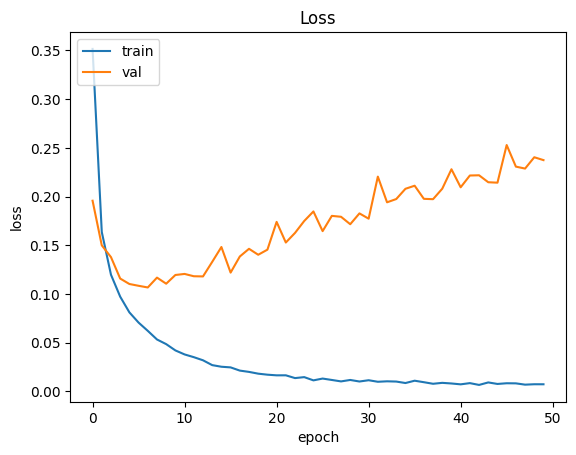

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
#### functional API

In [85]:
input_shape = (x_train_scaled.shape[1],)

input =Input(shape=input_shape)
hidden_1st = Dense(50, activation='relu')(input)
hidden_2nd = Dense(20, activation='relu')(hidden_1st)
output = Dense(10, activation='softmax')(hidden_2nd)


clf_model_func = Model(input,output)
clf_model_func.compile(loss='categorical_crossentropy', metrics=['accuracy'])
clf_model_func.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_47 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_48 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [86]:
with tf.device("/device:GPU:0"):
    history = clf_model_func.fit(x_train_scaled, y_train_onehot, validation_data=(x_test_scaled, y_test_onehot), batch_size=32, epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 6s 4ms/step - loss: 0.3408 - accuracy: 0.9029 - val_loss: 0.2039 - val_accuracy: 0.9424
Epoch 2/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1695 - accuracy: 0.9503 - val_loss: 0.1783 - val_accuracy: 0.9497
Epoch 3/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1314 - accuracy: 0.9612 - val_loss: 0.1406 - val_accuracy: 0.9604
Epoch 4/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1083 - accuracy: 0.9678 - val_loss: 0.1268 - val_accuracy: 0.9639
Epoch 5/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0957 - accuracy: 0.9715 - val_loss: 0.1206 - val_accuracy: 0.9665
Epoch 6/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9752 - val_loss: 0.1166 - val_accuracy: 0.9689
Epoch 7/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0773 - accuracy: 0.9778 - val_loss: 0.1177 - val_accuracy:

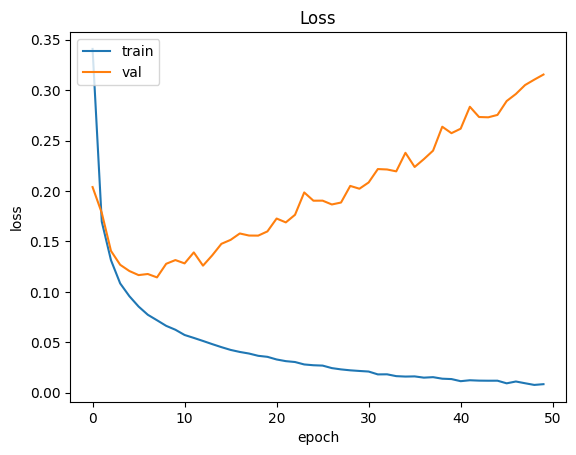

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Homework

In [35]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.keys())
print(housing.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [36]:
# x_data : 데이터
# y_data : 타겟
x_data = housing.data
y_data = housing.target

# 데이터셋 shape 출력
print(x_data.shape)
print(y_data.shape)

(20640, 8)
(20640,)


In [37]:
from sklearn import model_selection
# train_test_split : 학습데이터와 테스트 데이터셋 비율 반영 , 여기서 TRAIN : TEST = 8 : 2
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data,y_data,test_size=0.2)

In [38]:
from sklearn.preprocessing import StandardScaler

# 각 데이터들을 정규화 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [39]:
x_train_scaled[1].shape

(8,)

In [54]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.losses import mean_squared_error
from tensorflow.python.keras.layers import Dropout

input_shape = x_train_scaled[1].shape
input =Input(shape=input_shape)
hidden_1st = Dense(100, activation='relu')(input)
drop_out1 = Dropout(0.5)(hidden_1st)
hidden_2nd = Dense(50, activation='relu')(drop_out1)
#출력 노드를 1개로 정하면 regressor
output = Dense(1, activation='relu')(hidden_2nd)

clf_model_func = Model(input,output)
clf_model_func.compile(loss=mean_squared_error, optimizer='Adam')
clf_model_func.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


In [55]:
with tf.device("/device:GPU:0"):
    history = clf_model_func.fit(x_train_scaled,y_train, validation_data=(x_test_scaled, y_test), epochs=50)    #뭔 버그인지 모르겠지만 ( ) 로 수정한걸, 다시 지우고 돌린뒤, 다시 붙이면 된다

Epoch 1/50
516/516 [==============================] - 2s 3ms/step - loss: 0.8848 - val_loss: 1.4903
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.5145 - val_loss: 3.8484
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.4686 - val_loss: 6.9243
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.4360 - val_loss: 9.9945
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.4151 - val_loss: 13.4751
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3990 - val_loss: 17.0482
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3920 - val_loss: 19.6275
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3765 - val_loss: 18.1177
Epoch 9/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3738 - val_loss: 19.0448
Epoch 10/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3594 - val_loss: 2

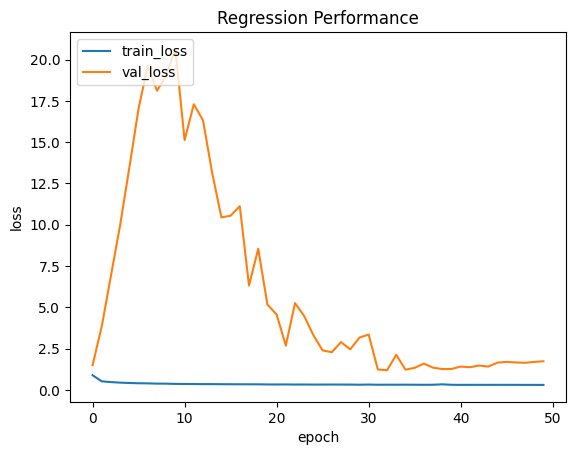

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Regression Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

In [43]:
from sklearn.metrics import r2_score

print(r2_score(y_test,clf_model_func.predict(x_test_scaled)))

-11.841139796328797
